In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                            accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, roc_curve)
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("="*70)
print("LOGISTIC REGRESSION & K-NEAREST NEIGHBOURS CLASSIFICATION")
print("="*70)


LOGISTIC REGRESSION & K-NEAREST NEIGHBOURS CLASSIFICATION


In [16]:
print("\n[1] LOADING DATA...")
df = pd.read_csv('Lab Results.csv')

print(f"\nDataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]}")
print(f"\nColumn Names:\n{df.columns.tolist()}")
print(f"\nFirst 5 rows:\n{df.head()}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nMissing Values:\n{df.isnull().sum()}")
print(f"\nBasic Statistics:\n{df.describe()}")

# Check target distribution
print(f"\nTarget Variable Distribution:")
print(df['SOURCE'].value_counts())
print(f"\nTarget Percentage:")
print(df['SOURCE'].value_counts(normalize=True) * 100)


[1] LOADING DATA...

Dataset Shape: (4412, 11)
Total Records: 4412

Column Names:
['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE']

First 5 rows:
   HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         35.1          11.8         4.65        6.3          310  25.4  33.6   
1         43.5          14.8         5.39       12.7          334  27.5  34.0   
2         33.5          11.3         4.74       13.2          305  23.8  33.7   
3         39.1          13.7         4.98       10.5          366  27.5  35.0   
4         30.9           9.9         4.23       22.1          333  23.4  32.0   

    MCV  AGE SEX SOURCE  
0  75.5    1   F    out  
1  80.7    1   F    out  
2  70.7    1   F    out  
3  78.5    1   F    out  
4  73.0    1   M    out  

Data Types:
HAEMATOCRIT     float64
HAEMOGLOBINS    float64
ERYTHROCYTE     float64
LEUCOCYTE       float64
THROMBOCYTE       int64
MCH  

In [17]:
print("\n[2] DATA PREPROCESSING...")

# Encode categorical variables
le_sex = LabelEncoder()
le_source = LabelEncoder()

df['SEX_ENCODED'] = le_sex.fit_transform(df['SEX'])
df['SOURCE_ENCODED'] = le_source.fit_transform(df['SOURCE'])

print(f"\nSEX Encoding: {dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_)))}")
print(f"SOURCE Encoding: {dict(zip(le_source.classes_, le_source.transform(le_source.classes_)))}")

# Separate features and target
X = df[['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
        'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX_ENCODED']]
y = df['SOURCE_ENCODED']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

# Feature scaling (important for KNN and Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Data preprocessing completed")


[2] DATA PREPROCESSING...

SEX Encoding: {'F': np.int64(0), 'M': np.int64(1)}
SOURCE Encoding: {'in': np.int64(0), 'out': np.int64(1)}

Features shape: (4412, 10)
Target shape: (4412,)

Training set: (3529, 10)
Testing set: (883, 10)

✓ Data preprocessing completed


In [18]:
print("\n" + "="*70)
print("[3] LOGISTIC REGRESSION MODEL")
print("="*70)

# Train Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation metrics
print("\n--- Logistic Regression Results ---")
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr,
                          target_names=['out', 'in']))

print("\nConfusion Matrix:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

# Cross-validation
cv_scores_lr = cross_val_score(lr_model, X_train_scaled, y_train, cv=5)
print(f"\nCross-Validation Scores: {cv_scores_lr}")
print(f"Mean CV Score: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std():.4f})")

# Feature importance (coefficients)
feature_importance_lr = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nFeature Importance (Coefficients):")
print(feature_importance_lr)



[3] LOGISTIC REGRESSION MODEL

--- Logistic Regression Results ---

Accuracy: 0.7203
Precision: 0.7329
Recall: 0.8346
F1-Score: 0.7804
ROC-AUC Score: 0.7579

Classification Report:
              precision    recall  f1-score   support

         out       0.69      0.55      0.61       357
          in       0.73      0.83      0.78       526

    accuracy                           0.72       883
   macro avg       0.71      0.69      0.70       883
weighted avg       0.72      0.72      0.71       883


Confusion Matrix:
[[197 160]
 [ 87 439]]

Cross-Validation Scores: [0.71813031 0.72521246 0.71954674 0.71954674 0.72765957]
Mean CV Score: 0.7220 (+/- 0.0037)

Feature Importance (Coefficients):
        Feature  Coefficient
5           MCH     0.967793
4   THROMBOCYTE     0.799471
2   ERYTHROCYTE     0.721091
3     LEUCOCYTE    -0.382793
7           MCV    -0.373326
6          MCHC    -0.260781
9   SEX_ENCODED    -0.222293
1  HAEMOGLOBINS    -0.154206
0   HAEMATOCRIT     0.131842
8    

In [19]:
print("\n" + "="*70)
print("[4] K-NEAREST NEIGHBOURS MODEL")
print("="*70)

# Find optimal K using GridSearch
print("\nFinding optimal K value...")
param_grid = {'n_neighbors': range(3, 31, 2)}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5,
                        scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train_scaled, y_train)

print(f"Best K value: {knn_grid.best_params_['n_neighbors']}")
print(f"Best CV Score: {knn_grid.best_score_:.4f}")

# Train KNN with optimal K
knn_model = knn_grid.best_estimator_
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation metrics
print("\n--- K-Nearest Neighbours Results ---")
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_knn):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn,
                          target_names=['out', 'in']))

print("\nConfusion Matrix:")
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

# Cross-validation
cv_scores_knn = cross_val_score(knn_model, X_train_scaled, y_train, cv=5)
print(f"\nCross-Validation Scores: {cv_scores_knn}")
print(f"Mean CV Score: {cv_scores_knn.mean():.4f} (+/- {cv_scores_knn.std():.4f})")



[4] K-NEAREST NEIGHBOURS MODEL

Finding optimal K value...
Best K value: 13
Best CV Score: 0.7416

--- K-Nearest Neighbours Results ---

Accuracy: 0.7350
Precision: 0.7589
Recall: 0.8137
F1-Score: 0.7853
ROC-AUC Score: 0.7855

Classification Report:
              precision    recall  f1-score   support

         out       0.69      0.62      0.65       357
          in       0.76      0.81      0.79       526

    accuracy                           0.73       883
   macro avg       0.73      0.72      0.72       883
weighted avg       0.73      0.73      0.73       883


Confusion Matrix:
[[221 136]
 [ 98 428]]

Cross-Validation Scores: [0.73229462 0.7407932  0.75779037 0.72521246 0.75177305]
Mean CV Score: 0.7416 (+/- 0.0120)


In [20]:
print("\n" + "="*70)
print("[5] MODEL COMPARISON")
print("="*70)

comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbours'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr),
                 accuracy_score(y_test, y_pred_knn)],
    'Precision': [precision_score(y_test, y_pred_lr),
                  precision_score(y_test, y_pred_knn)],
    'Recall': [recall_score(y_test, y_pred_lr),
               recall_score(y_test, y_pred_knn)],
    'F1-Score': [f1_score(y_test, y_pred_lr),
                 f1_score(y_test, y_pred_knn)],
    'ROC-AUC': [roc_auc_score(y_test, y_pred_proba_lr),
                roc_auc_score(y_test, y_pred_proba_knn)]
})

print("\n", comparison_df.to_string(index=False))


[5] MODEL COMPARISON

                Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
 Logistic Regression  0.720272   0.732888 0.834601  0.780444 0.757889
K-Nearest Neighbours  0.734994   0.758865 0.813688  0.785321 0.785536



[6] GENERATING VISUALIZATIONS...
✓ Visualizations saved as 'logistic_knn_results.png'


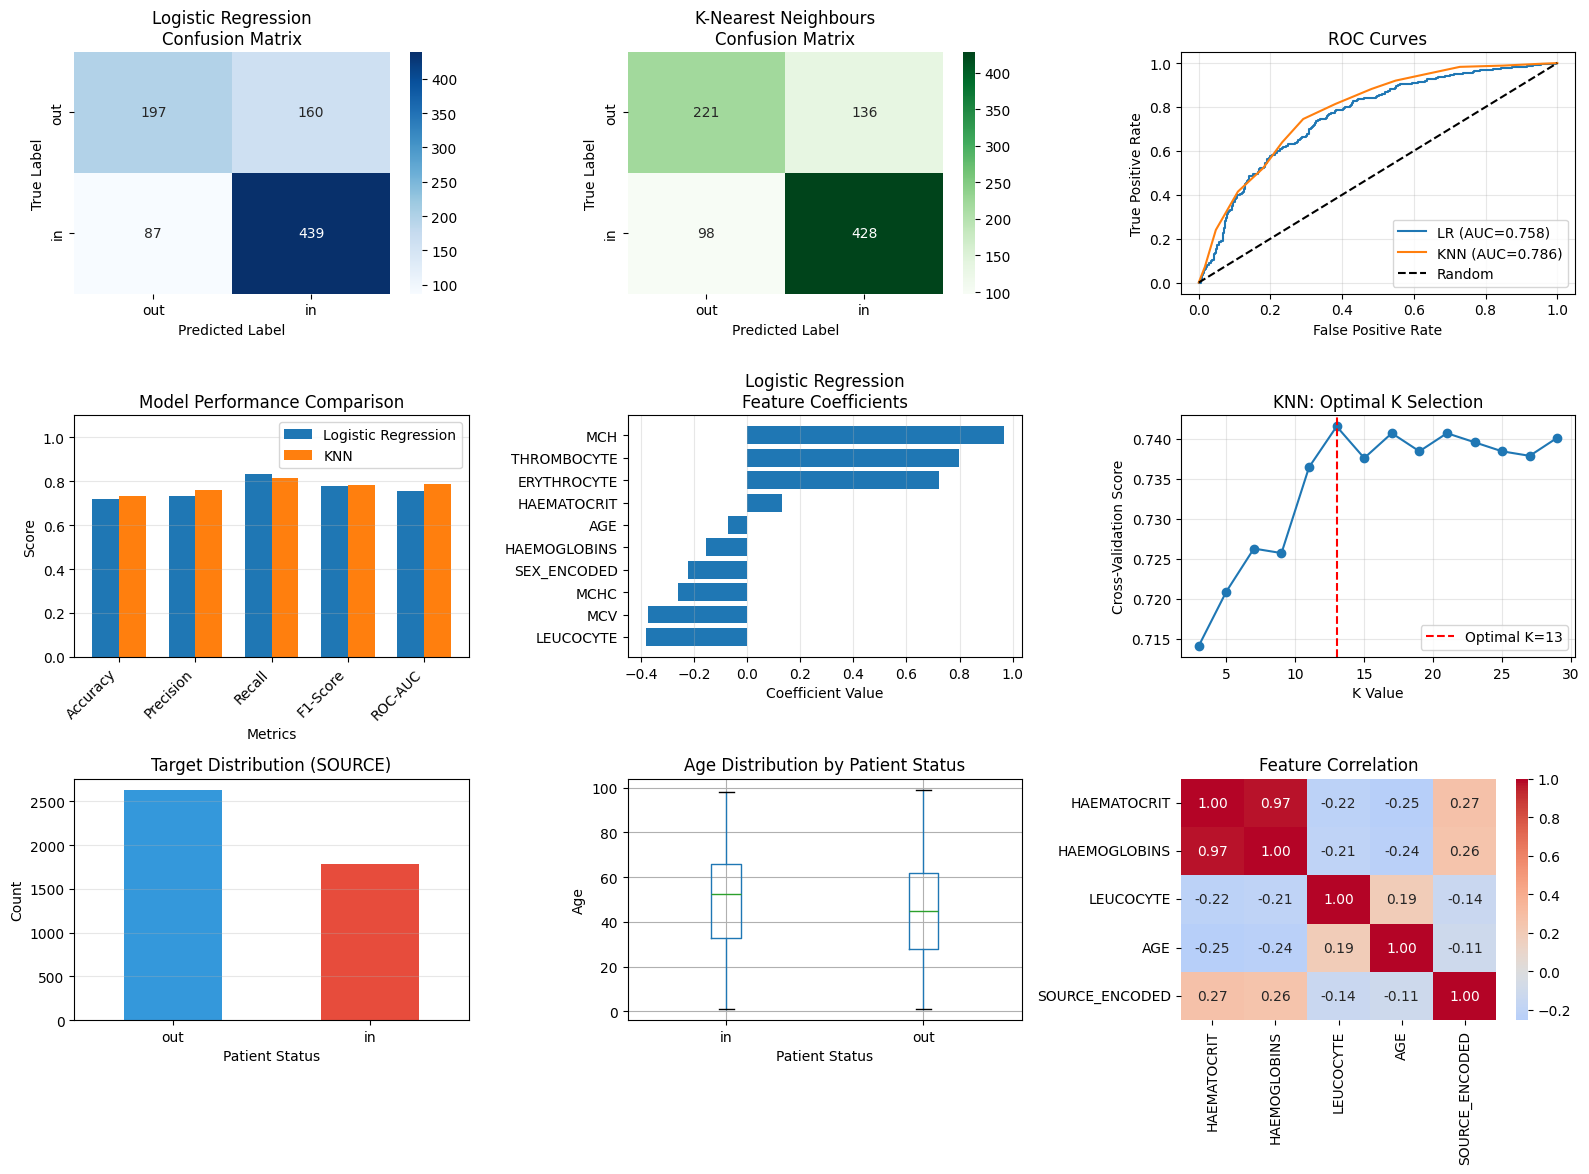

In [21]:
print("\n[6] GENERATING VISUALIZATIONS...")

# Create figure with subplots
fig = plt.figure(figsize=(16, 12))

# 1. Confusion Matrices
ax1 = plt.subplot(3, 3, 1)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['out', 'in'], yticklabels=['out', 'in'])
plt.title('Logistic Regression\nConfusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

ax2 = plt.subplot(3, 3, 2)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens',
            xticklabels=['out', 'in'], yticklabels=['out', 'in'])
plt.title('K-Nearest Neighbours\nConfusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# 2. ROC Curves
ax3 = plt.subplot(3, 3, 3)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
plt.plot(fpr_lr, tpr_lr, label=f'LR (AUC={roc_auc_score(y_test, y_pred_proba_lr):.3f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC={roc_auc_score(y_test, y_pred_proba_knn):.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Model Comparison Bar Plot
ax4 = plt.subplot(3, 3, 4)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(metrics))
width = 0.35
plt.bar(x - width/2, comparison_df.iloc[0, 1:], width, label='Logistic Regression')
plt.bar(x + width/2, comparison_df.iloc[1, 1:], width, label='KNN')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0, 1.1)

# 4. Feature Importance (LR Coefficients)
ax5 = plt.subplot(3, 3, 5)
feature_importance_lr_sorted = feature_importance_lr.sort_values('Coefficient')
plt.barh(feature_importance_lr_sorted['Feature'],
         feature_importance_lr_sorted['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression\nFeature Coefficients')
plt.grid(True, alpha=0.3, axis='x')

# 5. K value optimization
ax6 = plt.subplot(3, 3, 6)
k_values = param_grid['n_neighbors']
k_scores = [knn_grid.cv_results_['mean_test_score'][i]
            for i in range(len(k_values))]
plt.plot(k_values, k_scores, marker='o')
plt.xlabel('K Value')
plt.ylabel('Cross-Validation Score')
plt.title('KNN: Optimal K Selection')
plt.grid(True, alpha=0.3)
plt.axvline(knn_grid.best_params_['n_neighbors'],
            color='r', linestyle='--',
            label=f"Optimal K={knn_grid.best_params_['n_neighbors']}")
plt.legend()

# 6. Target Distribution
ax7 = plt.subplot(3, 3, 7)
df['SOURCE'].value_counts().plot(kind='bar', color=['#3498db', '#e74c3c'])
plt.title('Target Distribution (SOURCE)')
plt.xlabel('Patient Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')

# 7. Age Distribution by Source
ax8 = plt.subplot(3, 3, 8)
df.boxplot(column='AGE', by='SOURCE', ax=ax8)
plt.title('Age Distribution by Patient Status')
plt.suptitle('')
plt.xlabel('Patient Status')
plt.ylabel('Age')

# 8. Correlation Heatmap (subset)
ax9 = plt.subplot(3, 3, 9)
corr_features = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'LEUCOCYTE', 'AGE', 'SOURCE_ENCODED']
sns.heatmap(df[corr_features].corr(), annot=True, fmt='.2f',
            cmap='coolwarm', center=0, ax=ax9)
plt.title('Feature Correlation')

plt.tight_layout()
plt.savefig('logistic_knn_results.png', dpi=300, bbox_inches='tight')
print("✓ Visualizations saved as 'logistic_knn_results.png'")
plt.show()


In [22]:
print("\n" + "="*70)
print("SUMMARY REPORT")
print("="*70)

print(f"""
Dataset Information:
- Total samples: {len(df)}
- Training samples: {len(X_train)}
- Testing samples: {len(X_test)}
- Number of features: {X.shape[1]}
- Target classes: {le_source.classes_}

Best Performing Model: {comparison_df.loc[comparison_df['Accuracy'].idxmax(), 'Model']}
Best Accuracy: {comparison_df['Accuracy'].max():.4f}
Best F1-Score: {comparison_df['F1-Score'].max():.4f}

Key Findings:
1. Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}
2. KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}
3. Optimal K for KNN: {knn_grid.best_params_['n_neighbors']}
4. Most important features (LR):
   - {feature_importance_lr.iloc[0]['Feature']}: {feature_importance_lr.iloc[0]['Coefficient']:.4f}
   - {feature_importance_lr.iloc[1]['Feature']}: {feature_importance_lr.iloc[1]['Coefficient']:.4f}
""")

print("\n" + "="*70)
print("ANALYSIS COMPLETE!")
print("="*70)


SUMMARY REPORT

Dataset Information:
- Total samples: 4412
- Training samples: 3529
- Testing samples: 883
- Number of features: 10
- Target classes: ['in' 'out']

Best Performing Model: K-Nearest Neighbours
Best Accuracy: 0.7350
Best F1-Score: 0.7853

Key Findings:
1. Logistic Regression Accuracy: 0.7203
2. KNN Accuracy: 0.7350
3. Optimal K for KNN: 13
4. Most important features (LR): 
   - MCH: 0.9678
   - THROMBOCYTE: 0.7995


ANALYSIS COMPLETE!
